In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-genetic-data/genetic_data_train.csv
/kaggle/input/human-genetic-data/genetic_data_test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("/kaggle/input/human-genetic-data/genetic_data_train.csv")

In [4]:
df.shape

(183, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       183 non-null    float64
 1   PC2       183 non-null    float64
 2   PC3       183 non-null    float64
 3   PC4       183 non-null    float64
 4   PC5       183 non-null    float64
 5   PC6       183 non-null    float64
 6   PC7       183 non-null    float64
 7   PC8       183 non-null    float64
 8   PC9       183 non-null    float64
 9   PC10      183 non-null    float64
 10  Ancestry  183 non-null    object 
dtypes: float64(10), object(1)
memory usage: 15.9+ KB


In [6]:
df.isnull().sum()

PC1         0
PC2         0
PC3         0
PC4         0
PC5         0
PC6         0
PC7         0
PC8         0
PC9         0
PC10        0
Ancestry    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Ancestry'].unique()

array(['African', 'European', 'EastAsian', 'Oceanian', 'NativeAmerican'],
      dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df['Ancestry'] =  le.fit_transform(df['Ancestry'])

In [11]:
df['Ancestry'].unique()

array([0, 2, 1, 4, 3])

In [12]:
X = df.drop(columns=['Ancestry'])  
y = df['Ancestry']

In [13]:
X.shape , y.shape

((183, 10), (183,))

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'ovr')

In [15]:
lr.fit(X,y)

LogisticRegression(multi_class='ovr')

In [16]:
test = pd.read_csv('/kaggle/input/human-genetic-data/genetic_data_test.csv')

In [17]:
test.shape

(111, 11)

In [18]:
test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,2.517683,5.464283,9.067873,-4.965928,-0.741937,0.039785,0.573279,-0.216918,2.454823,-0.671274,Unknown
1,6.077012,1.032867,-5.795883,-3.490064,-0.600204,-0.120803,1.243767,1.821390,-1.173053,2.442467,Unknown
2,1.016945,-2.913299,0.907702,1.233580,-1.983452,1.605964,2.674998,-0.732921,-2.157438,-0.671274,Unknown
3,-10.860926,2.545077,0.023950,-1.474450,0.372286,-2.609954,-2.794092,1.264747,-3.974644,-0.671274,Unknown
4,4.790262,3.621650,-1.442221,5.459907,-0.864235,-2.591185,-0.062762,0.515344,0.228729,-0.671274,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
106,-11.030349,1.712786,-1.392893,-0.163989,3.623641,-0.263645,-3.337796,2.279226,-2.632659,-0.671274,AfricanAmerican
107,-7.994173,0.045333,-0.738547,0.189793,-2.545140,-0.332066,0.026289,-1.840944,-0.456438,-0.671274,AfricanAmerican
108,-8.874531,2.074620,-2.060999,-0.898143,-1.372896,-3.175091,2.325163,-1.256258,-0.133253,-0.671274,AfricanAmerican
109,-7.017063,-0.199721,-1.469538,-1.997714,1.892038,-1.880466,-3.278863,-0.336890,0.042410,-0.671274,AfricanAmerican


In [19]:
X_test = test.drop(columns=['Ancestry'])
y_test = test['Ancestry']

In [20]:
y_test= le.fit_transform(y_test)

In [21]:
y_test

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [22]:
y_pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score


In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.4774774774774775
Precision: 0.20363382250174702
Recall: 0.24
F1 Score: 0.2105952380952381


In [25]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_pred, y_test)
print(confusion_matrix(y_pred,y_test))

print(report)

[[52  0  1  0  0]
 [ 0  0  1  0  0]
 [ 0 26  1  0  0]
 [ 0 28  1  0  0]
 [ 0  0  1  0  0]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.00      0.00      0.00         1
           2       0.20      0.04      0.06        27
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00         1

    accuracy                           0.48       111
   macro avg       0.24      0.20      0.21       111
weighted avg       0.53      0.48      0.49       111



## Hyperparameter tunning using gridsearch CV

In [26]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [27]:
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'class_weight': [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(multi_class='multinomial', max_iter=1000),
                           param_grid=param_grid ,cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X, y)

# Best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 0.01, 'class_weight': {0: 1, 1: 1}, 'solver': 'newton-cg'}


In [29]:
y_pred  = grid_search.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.46846846846846846


In [31]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_pred, y_test)
print(confusion_matrix(y_pred,y_test))

print(report)

[[51  0  1  0  0]
 [ 0  0  1  0  0]
 [ 1 27  1  0  0]
 [ 0 27  1  0  0]
 [ 0  0  1  0  0]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.00      0.00      0.00         1
           2       0.20      0.03      0.06        29
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00         1

    accuracy                           0.47       111
   macro avg       0.24      0.20      0.21       111
weighted avg       0.51      0.47      0.47       111



## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dt = DecisionTreeRegressor(max_depth= 3)
dt.fit(X,y)


DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'x[3] <= -1.542\nsquared_error = 1.64\nsamples = 183\nvalue = 1.874'),
 Text(0.3, 0.625, 'x[1] <= 3.533\nsquared_error = 0.316\nsamples = 56\nvalue = 3.429'),
 Text(0.2, 0.375, 'x[5] <= 1.409\nsquared_error = 0.062\nsamples = 30\nvalue = 2.933'),
 Text(0.1, 0.125, 'squared_error = 0.0\nsamples = 28\nvalue = 3.0'),
 Text(0.3, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 2.0'),
 Text(0.4, 0.375, 'squared_error = 0.0\nsamples = 26\nvalue = 4.0'),
 Text(0.7, 0.625, 'x[0] <= -4.264\nsquared_error = 0.689\nsamples = 127\nvalue = 1.189'),
 Text(0.6, 0.375, 'squared_error = 0.0\nsamples = 25\nvalue = 0.0'),
 Text(0.8, 0.375, 'x[3] <= 1.112\nsquared_error = 0.426\nsamples = 102\nvalue = 1.48'),
 Text(0.7, 0.125, 'squared_error = 0.219\nsamples = 38\nvalue = 2.211'),
 Text(0.9, 0.125, 'squared_error = 0.045\nsamples = 64\nvalue = 1.047')]

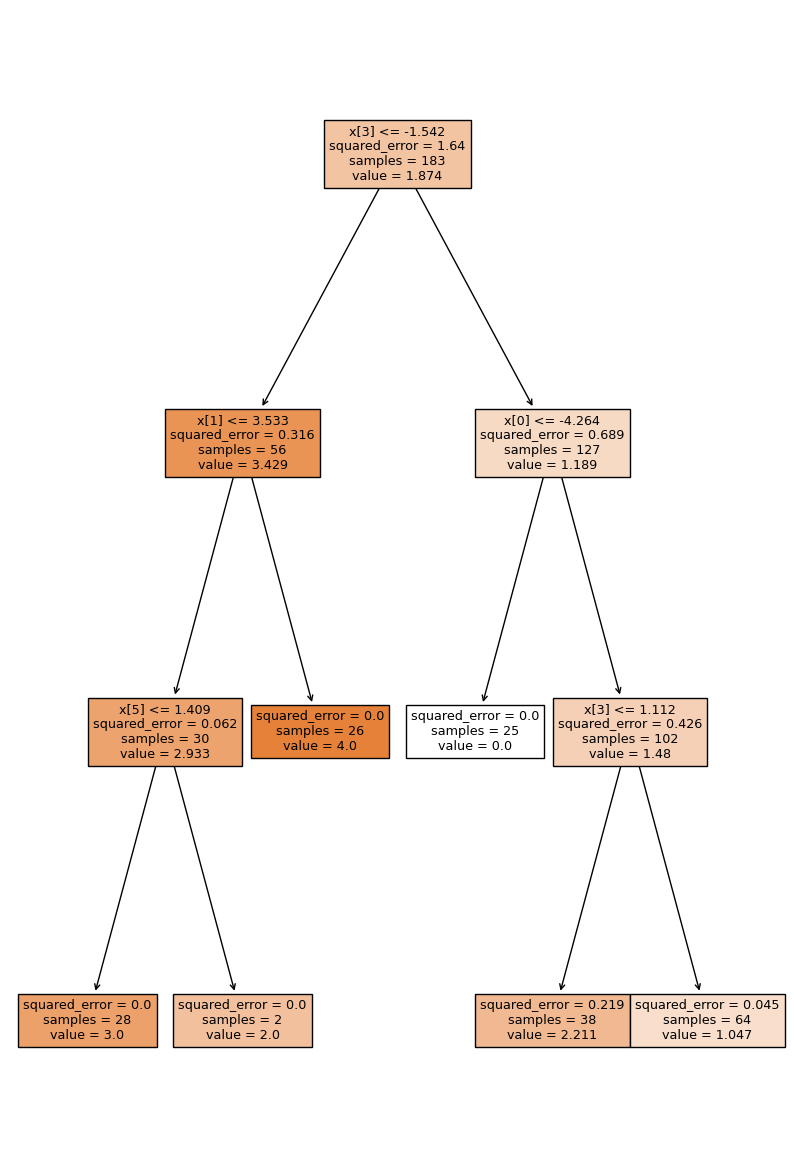

In [34]:
#Visualizing
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(dt,filled=True)

In [35]:
y_pred = dt.predict(X_test)

In [36]:
y_test

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [37]:
y_pred

array([4.        , 3.        , 1.046875  , 0.        , 1.046875  ,
       3.        , 3.        , 2.21052632, 3.        , 2.21052632,
       3.        , 2.21052632, 2.21052632, 3.        , 3.        ,
       3.        , 2.21052632, 3.        , 3.        , 2.21052632,
       2.21052632, 2.21052632, 2.21052632, 2.        , 2.21052632,
       2.        , 2.21052632, 2.21052632, 3.        , 2.21052632,
       2.21052632, 2.21052632, 2.21052632, 3.        , 2.21052632,
       2.21052632, 3.        , 2.21052632, 3.        , 3.        ,
       2.21052632, 2.21052632, 2.        , 2.        , 3.        ,
       2.21052632, 2.21052632, 2.21052632, 3.        , 2.21052632,
       2.21052632, 2.21052632, 2.21052632, 3.        , 2.21052632,
       3.        , 3.        , 3.        , 2.21052632, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 3.        , 0.     

In [38]:
pred = pd.DataFrame(y_pred , y_test)
pred

,0
2,4.000000
2,3.000000
2,1.046875
2,0.000000
2,1.046875
...,...
0,0.000000
0,0.000000
0,0.000000
0,3.000000


In [39]:
from sklearn.metrics import mean_squared_error as mse

In [40]:
print('MSE is:', mse(y_test,y_pred))

MSE is: 1.5295325528631993


In [41]:
y_query = dt.predict([[2.517683,5.46428 ,9.067873,-4.965928,-0.741937,0.039785,0.573279,-0.216918,2.454823,-0.671274]])

In [42]:
y_query

array([4.])

In [43]:
y_test

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [44]:
param = {
    'criterion' : ['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [45]:
regressor = DecisionTreeRegressor()

In [46]:
grid = GridSearchCV(regressor,param_grid = param, cv=5 , scoring='neg_mean_squared_error')

In [47]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [48]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [49]:
y_pred1 = grid.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [51]:
print(f"r2-score is:", r2_score(y_test,y_pred1))
print(f"MSE-score is:", mean_squared_error(y_test,y_pred1))
print(f"MAE-score is:", mean_absolute_error(y_test,y_pred1))

r2-score is: -5.220574257465707
MSE-score is: 2.079078385865089
MAE-score is: 1.0903271692745378


In [52]:
decision = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 5,max_features= 'auto',splitter= 'random')

In [53]:
decision.fit(X,y)

DecisionTreeRegressor(max_depth=5, max_features='auto', splitter='random')

In [54]:
new_pred = decision.predict(X_test)
print(f"r2-score is:", r2_score(y_test,new_pred))
print(f"MSE-score is:", mean_squared_error(y_test,new_pred))
print(f"MAE-score is:", mean_absolute_error(y_test,new_pred))

r2-score is: -2.09980573093735
MSE-score is: 1.0360360360360361
MAE-score is: 0.6936936936936937
